In [ ]:
# get the climate data
# consider Geophysical Fluid Dynamics Laboratory Earth System Model 2G 
# Differences in the ocean mean state include the thermocline depth 
# being relatively deep in ESM2M and relatively shallow in ESM2G compared to observations
# ref https://www.usgs.gov/publications/gfdls-esm2-global-coupled-climate-carbon-earth-system-models-part-i-physical
# import os
# import pathlib

# import rioxarray as rxr
# import xarray as xr
# import geopandas as gpd

In [ ]:
# # Define the current working directory (replace `cwd` with the appropriate path)
# cwd = os.getcwd()
# # Define file paths with name of county shapefile downloaded
# co_path = os.path.join(cwd, 'boulder_county.shp')
# # Read the boulder_county shapefile for climate boundary
# boulder_climate_gdf = gpd.read_file(co_path)
# boulder_climate_gdf.plot()

In [ ]:
# def convert_longitude(longitude):
#     """convert longitude from 0 to 360 to -180 to 180"""
#     return(longitude - 360) if longitude > 180 else longitude

# # Catalog http://thredds.northwestknowledge.net:8080/thredds/catalog.html
# # GDFL-ESM2G is a US model http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/GFDL-ESM2G/catalog.html
# climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_vpd_GFDL-ESM2G_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc' #2016-2020 model
# # TRY BNU
# # climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/BNU-ESM/catalog.html?dataset=REACCHDatasetScan_BNU-ESM_MACAV2/macav2metdata_vpd_BNU-ESM_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc' #BNU
# # # look at est then actual 2016-2020 then 2036-2040?

# climate_est_ds1 = xr.open_dataset(climate_est_url1).squeeze()
# # climate_est_ds1.lon = [convert_longitude(lon) for lon in climate_est_ds1.lon]

# climate_est_url1

In [ ]:
# climate_est_ds1

In [ ]:
# climate_est_ds1.rio.clip_box(*boulder_climate_gdf.to.crs(climate_est_ds1.rio.crs).total_bounds)

In [ ]:
# get the climate data
# consider Geophysical Fluid Dynamics Laboratory Earth System Model 2G 
# Differences in the ocean mean state include the thermocline depth 
# being relatively deep in ESM2M and relatively shallow in ESM2G compared to observations
# ref https://www.usgs.gov/publications/gfdls-esm2-global-coupled-climate-carbon-earth-system-models-part-i-physical
# used several iterations of ChatGPT on above commented out code

import os
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths with name of county shapefile downloaded
co_path = os.path.join(cwd, 'boulder_county.shp')

# Read the Boulder County shapefile for climate boundary
boulder_climate_gdf = gpd.read_file(co_path)

# Function to convert longitude from 0-360 to -180 to 180
def convert_longitude(lon):
    """Convert longitude from 0-360 to -180 to 180"""
    return (lon - 360) if lon > 180 else lon

# URL for climate data (precipitation in this case)
climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_pr_GFDL-ESM2G_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc'  # Example URL for precipitation data

# Load the climate dataset
climate_est_ds1 = xr.open_dataset(climate_est_url1).squeeze()

# Adjust the longitude values from 0-360 to -180 to 180
climate_est_ds1 = climate_est_ds1.assign_coords(
    lon=((climate_est_ds1.lon + 180) % 360 - 180)
).sortby('lon')

# Extract the precipitation variable as a DataArray
precipitation = climate_est_ds1['precipitation']

# Ensure spatial dimensions are set for the precipitation DataArray
precipitation = precipitation.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)

# Select a specific time slice (e.g., the first time step)
precipitation_time_slice = precipitation.isel(time=0)

# Ensure spatial dimensions are retained for the time slice
precipitation_time_slice = precipitation_time_slice.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)

# Clip the dataset to the boundaries of Boulder County
boulder_climate_bounds = boulder_climate_gdf.to_crs(precipitation_time_slice.rio.crs).total_bounds
clipped_ds = precipitation_time_slice.rio.clip_box(*boulder_climate_bounds)

# Export the clipped dataset to a GeoTIFF file
output_path = os.path.join(cwd, 'boulder_precipitation.tif')
clipped_ds.rio.to_raster(output_path)

print(f"GeoTIFF saved to {output_path}")


GeoTIFF saved to c:\Users\gpaul\Documents\GitHub\bluespruce\boulder_precipitation.tif


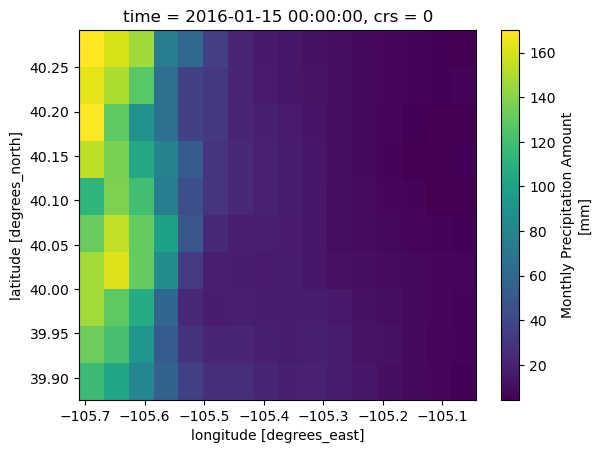

In [3]:
clipped_ds.plot()
